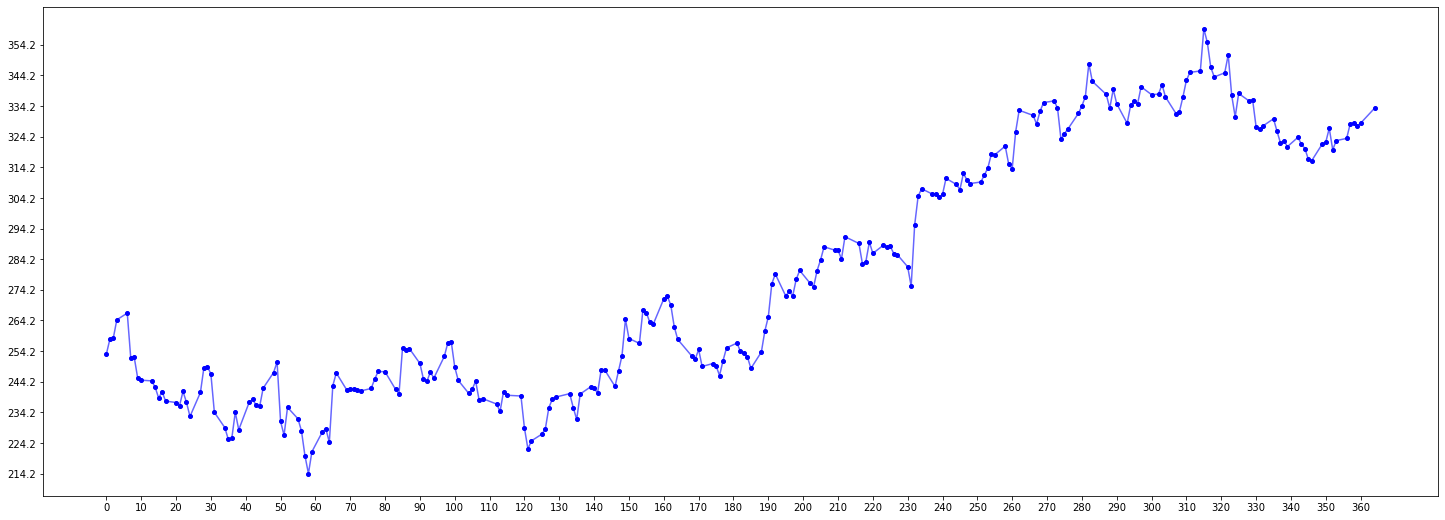

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import time
from time import mktime
from datetime import datetime

df = pd.read_csv('/home/max/MSFT.csv', parse_dates = True)
days = [datetime.fromtimestamp(mktime(time.strptime(df['Date'][i], '%Y-%m-%d'))) for i in range(df.shape[0])]
days_by_ind = [(days[i] - days[0]).days for i in range(df.shape[0])]
sales = pd.DataFrame(data = {'Day': days_by_ind, 'Close': df['Close']})

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(25, 9))
plt.plot(np.array(sales['Day']), np.array(sales['Close']), 'ob', alpha = 1, markersize = 4)
plt.plot(np.array(sales['Day']), np.array(sales['Close']), 'b', alpha = 0.6)
plt.xticks(np.arange(0, max(days_by_ind), 10));
plt.yticks(np.arange(min(sales['Close']), max(sales['Close']), 10));

## Скользящее среднее

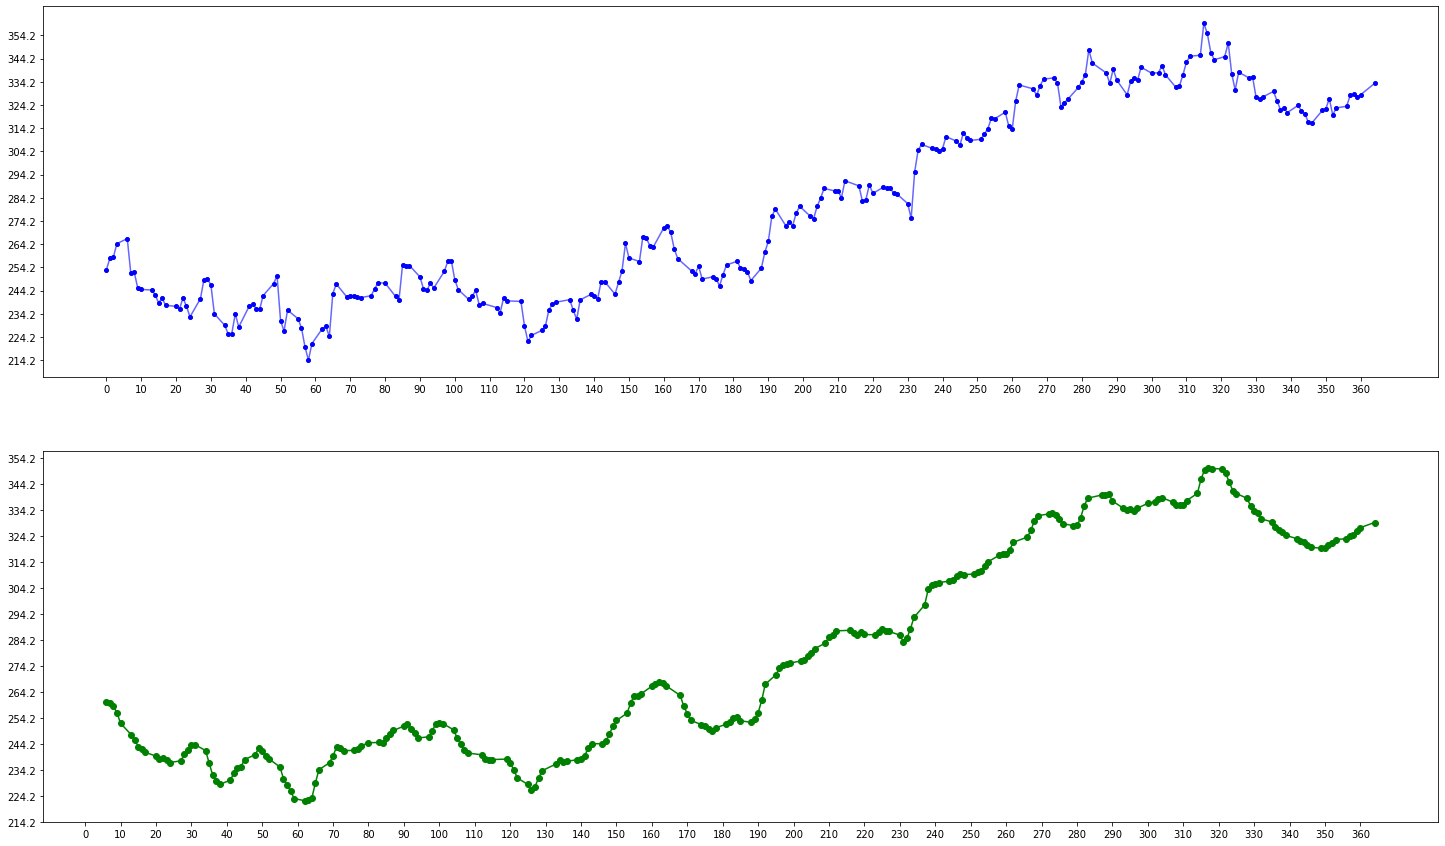

In [3]:
plt.figure(figsize=(25, 15))
plt.subplot(2, 1, 1);
plt.plot(np.array(sales['Day']), np.array(sales['Close']), 'ob', alpha = 1, markersize = 4);
plt.plot(np.array(sales['Day']), np.array(sales['Close']), 'b', alpha = 0.6);
plt.xticks(np.arange(0, max(days_by_ind), 10));
plt.yticks(np.arange(min(sales['Close']), max(sales['Close']), 10));

n = 5 #параметр окна
rolling_mean = sales['Close'].rolling(window=n).mean()

plt.subplot(2, 1, 2);
plt.plot(np.array(sales['Day']), np.array(rolling_mean), "og", label="Rolling mean trend");
plt.plot(np.array(sales['Day']), np.array(rolling_mean), "g", label="Rolling mean trend");
plt.xticks(np.arange(0, max(days_by_ind), 10));
plt.yticks(np.arange(min(sales['Close']), max(sales['Close']), 10));


## Модель Хольта-Винтерса

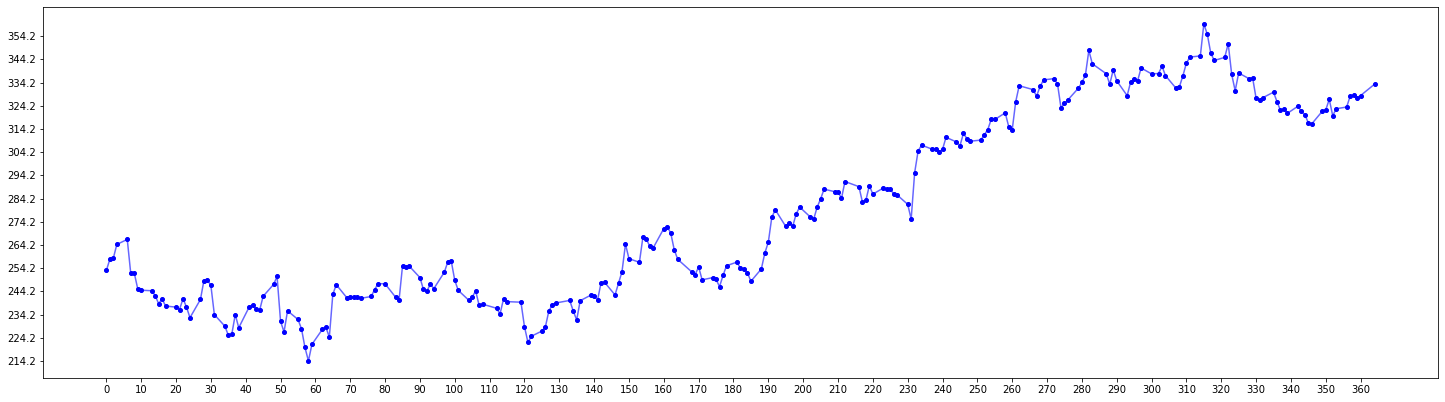

In [4]:
plt.figure(figsize=(25, 15))
plt.subplot(2, 1, 1);
plt.plot(np.array(sales['Day']), np.array(sales['Close']), 'ob', alpha = 1, markersize = 4);
plt.plot(np.array(sales['Day']), np.array(sales['Close']), 'b', alpha = 0.6);
plt.xticks(np.arange(0, max(days_by_ind), 10));
plt.yticks(np.arange(min(sales['Close']), max(sales['Close']), 10));
plt.subplot(2, 1, 2);
